In [53]:
%run lib.py

In [54]:
np.set_printoptions(edgeitems=10, linewidth=80)

---

In [55]:
sim_raw = joblib.load('data/sim.pickle')

In [56]:
sim = joblib.load('data/sim_lapin.pickle')

In [57]:
w, v = np.linalg.eig(sim)

In [58]:
max_w = np.argmax(w)

In [59]:
max_v = v[:, max_w]

In [60]:
max_v = max_v.clip(0, 1)

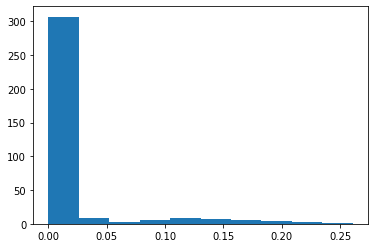

In [61]:
plt.hist(max_v);

In [62]:
max_v_norm = max_v / np.sqrt((max_v**2).sum())

In [63]:
np.linalg.norm(max_v_norm)

1.0

In [64]:
u = max_v_norm

In [65]:
xi = u.T.dot(sim).dot(u) / (u.T.dot(u) ** 2)
mu = np.sqrt(xi)

In [66]:
mu

0.9353055232085904

---
Sample data

In [67]:
sample_scores = np.array(
    [[ 0.6,  0.4,  0. ,  0. ,  0. ],
     [ 0. ,  0. ,  0.2,  0.3,  0.5],
     [ 0. ,  0.2,  0.4,  0.4,  0. ],
     [ 0.2,  0.2,  0.2,  0.2,  0.2]]
)

In [68]:
sample_scores

array([[ 0.6,  0.4,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.2,  0.3,  0.5],
       [ 0. ,  0.2,  0.4,  0.4,  0. ],
       [ 0.2,  0.2,  0.2,  0.2,  0.2]])

In [69]:
relevance_weights = (sample_scores > 0).sum(axis=1)
relevance_weights = relevance_weights / relevance_weights.max()
relevance_weights

array([ 0.4,  0.6,  0.6,  1. ])

In [70]:
sample_scores_wt = sample_scores*np.sqrt(relevance_weights[:, None])


In [71]:
sample_sim = np.dot(sample_scores_wt.T, sample_scores_wt)
sample_sim

array([[ 0.184,  0.136,  0.04 ,  0.04 ,  0.04 ],
       [ 0.136,  0.128,  0.088,  0.088,  0.04 ],
       [ 0.04 ,  0.088,  0.16 ,  0.172,  0.1  ],
       [ 0.04 ,  0.088,  0.172,  0.19 ,  0.13 ],
       [ 0.04 ,  0.04 ,  0.1  ,  0.13 ,  0.19 ]])

In [72]:
np.array_equal(sample_sim, sample_sim.T)

True

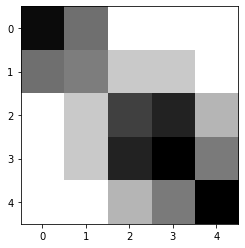

In [21]:
plt.imshow(sample_sim, cmap='Greys');

---
LAPIN

In [73]:
from lapin import LapinTransformer

In [74]:
t = LapinTransformer(sample_sim)
Lp = t.Lp

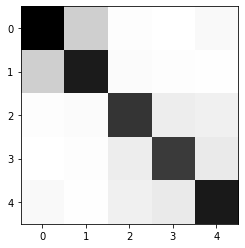

In [24]:
plt.imshow(Lp, cmap='Greys');

---

FADDIS

In [26]:
from faddis import FADDIS

In [27]:
import logging
logging.basicConfig(level='INFO')
logging.getLogger('FADDIS').setLevel('INFO')

In [28]:
f = FADDIS(10)
clu, intens,contr = f.predict(Lp)

INFO:FADDIS:i = 0, xi = 0.7924, sqrt(xi) = 0.8902
INFO:FADDIS:E = 2.3951
INFO:FADDIS:i = 1, xi = 0.6106, sqrt(xi) = 0.7814
INFO:FADDIS:E = 2.0222
INFO:FADDIS:i = 2, xi = 0.4672, sqrt(xi) = 0.6835
INFO:FADDIS:E = 1.8039
INFO:FADDIS:i = 3, xi = 0.1622, sqrt(xi) = 0.4027
INFO:FADDIS:E = 1.7776
INFO:FADDIS:i = 4, xi = 0.1659, sqrt(xi) = 0.4073
INFO:FADDIS:E = 1.7501
INFO:FADDIS:i = 5, xi = 0.1669, sqrt(xi) = 0.4085
INFO:FADDIS:E = 1.7223
INFO:FADDIS:i = 6, xi = 0.3111, sqrt(xi) = 0.5578
INFO:FADDIS:E = 1.6255
INFO:FADDIS:xi < 0 -> break


In [29]:
1/Lp.shape[0] *100

20.0

In [30]:
clu[:2]

array([[ 0.7668,  0.6419,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0345,  0.3546,  0.9344]])

---
Step by step

In [31]:
W = Lp.copy()

In [32]:

w, v = np.linalg.eig(W)
argmax_w = np.argmax(w)
print(w,)
print(v)
print(argmax_w)
max_v = v[:, argmax_w]
print(max_v)

[ 0.      1.2016  0.7967  0.6721  0.7019]
[[-0.3827  0.6206 -0.2625 -0.614  -0.15  ]
 [-0.4487  0.5195  0.199   0.6756  0.1808]
 [-0.4784 -0.2987  0.5217 -0.0714 -0.6362]
 [-0.496  -0.3554  0.1715 -0.2977  0.7139]
 [-0.4211 -0.3597 -0.7681  0.2699 -0.1746]]
1
[ 0.6206  0.5195 -0.2987 -0.3554 -0.3597]


In [33]:
max_v_normed = max_v / np.sqrt((max_v**2).sum())
max_v_normed

array([ 0.6206,  0.5195, -0.2987, -0.3554, -0.3597])

In [34]:
u = max_v_normed.clip(0, 1).reshape(-1, 1)
u = u / np.sqrt((u**2).sum())
u

array([[ 0.7668],
       [ 0.6419],
       [ 0.    ],
       [ 0.    ],
       [ 0.    ]])

In [35]:
xi = u.T.dot(W).dot(u) / (u.T.dot(u) ** 2)
xi

array([[ 0.7924]])

In [36]:
g = (xi * u.T.dot(u)) ** 2
g

array([[ 0.6279]])

In [37]:
xi * u.dot(u.T)

array([[ 0.4659,  0.39  ,  0.    ,  0.    ,  0.    ],
       [ 0.39  ,  0.3265,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ]])

In [38]:
W -= xi * u.dot(u.T)

---
Zachary karate club

In [ ]:
zachary_ = np.loadtxt('skar.dat')

In [ ]:
zachary_.shape

In [56]:
zachary = np.loadtxt('zachary.dat.txt')[:34]

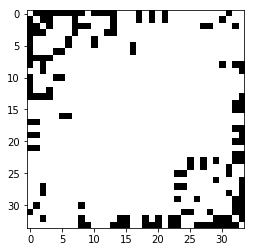

In [57]:
plt.imshow(zachary_, cmap='Greys')

In [58]:
zachary = zachary_

In [59]:
zachary[np.eye(*zachary.shape, dtype=bool)] = 1

In [60]:
np.linalg.eig(zachary)[0].real.argmax()

0

In [61]:
np.linalg.eig(zachary)[1][:, 0].real

array([-0.3555, -0.266 , -0.3172, -0.2112, -0.076 , -0.0795, -0.0795,
       -0.171 , -0.2274, -0.1027, -0.076 , -0.0529, -0.0843, -0.2265,
       -0.1014, -0.1014, -0.0236, -0.0924, -0.1014, -0.1479, -0.1014,
       -0.0924, -0.1014, -0.1501, -0.0571, -0.0592, -0.0756, -0.1335,
       -0.1311, -0.135 , -0.1748, -0.191 , -0.3086, -0.3734])

In [62]:
clu, intns, contr = FADDIS(5).predict(zachary)

INFO:FADDIS:i = 0, xi = 7.7257, sqrt(xi) = 2.7795
INFO:FADDIS:E = 130.3136
INFO:FADDIS:i = 1, xi = 3.1796, sqrt(xi) = 1.7831
INFO:FADDIS:E = 120.2037
INFO:FADDIS:i = 2, xi = 3.1517, sqrt(xi) = 1.7753
INFO:FADDIS:E = 110.2704
INFO:FADDIS:i = 3, xi = 2.7202, sqrt(xi) = 1.6493
INFO:FADDIS:E = 102.8707
INFO:FADDIS:i = 4, xi = 2.3241, sqrt(xi) = 1.5245
INFO:FADDIS:E = 97.4693


In [63]:
contr * len(zachary)

array([[ 10.6807,   1.8091,   1.7775,   1.3242,   0.9666]])

In [64]:
clu[1:5].T

array([[ 0.5432,  0.    ,  0.2097,  0.0232],
       [ 0.3776,  0.    ,  0.    ,  0.0036],
       [ 0.1842,  0.    ,  0.    ,  0.1272],
       [ 0.3552,  0.    ,  0.    ,  0.1089],
       [ 0.188 ,  0.    ,  0.3764,  0.    ],
       [ 0.2045,  0.    ,  0.4953,  0.    ],
       [ 0.2045,  0.    ,  0.4953,  0.    ],
       [ 0.2934,  0.    ,  0.    ,  0.0888],
       [ 0.    ,  0.049 ,  0.    ,  0.    ],
       [ 0.    ,  0.0375,  0.    ,  0.    ],
       [ 0.188 ,  0.    ,  0.3764,  0.    ],
       [ 0.1091,  0.    ,  0.0744,  0.0038],
       [ 0.1805,  0.    ,  0.    ,  0.0438],
       [ 0.1888,  0.    ,  0.    ,  0.0358],
       [ 0.    ,  0.2039,  0.0077,  0.    ],
       [ 0.    ,  0.2039,  0.0077,  0.    ],
       [ 0.0822,  0.0061,  0.3429,  0.    ],
       [ 0.185 ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.2039,  0.0077,  0.    ],
       [ 0.0805,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.2039,  0.0077,  0.    ],
       [ 0.185 ,  0.    ,  0.    ,  0.    ],
       [ 0